In [1]:
# Untuk keperluan Skripsi

In [2]:
#libraries
import numpy as np
import seaborn as sns
import pandas as pd
import random
import joblib
import matplotlib.pyplot as plt
import matplotlib.colors as tab
from matplotlib_venn import venn3

import sklearn
from sklearn import ensemble, preprocessing, utils
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.inspection import permutation_importance

In [3]:
data = pd.read_csv(r'C:\Users\geerv\Documents\Skripsi\2halide.csv')
data

,id,a_atom,b1_atom,b2_atom,composition,distance_a,distance_b1,distance_b2,x_atom,cubic,...,rp_a,rp_b1,rp_b2,rp_x,rs_a,rs_b1,rs_b2,rs_x,ind_gap,heat_of_formation
0,Cs.Ag.Al.Br-cubic,Cs,Ag,Al,Cs.Ag.Al.Br,3.870604,2.912570,2.555464,Br,1,...,2.60,1.33,0.905,0.62,1.71,1.045,0.77,0.580,1.0274,-1.240558
1,Cs.Ag.As.Br-cubic,Cs,Ag,As,Cs.Ag.As.Br,3.925597,2.858240,2.692150,Br,1,...,2.60,1.33,0.745,0.62,1.71,1.045,0.67,0.580,0.7810,-1.012833
2,Cs.Ag.Bi.Br-cubic,Cs,Ag,Bi,Cs.Ag.Bi.Br,4.059806,2.856817,2.884582,Br,1,...,2.60,1.33,1.077,0.62,1.71,1.045,0.92,0.580,1.1399,-1.145090
3,Cs.Ag.Ga.Br-cubic,Cs,Ag,Ga,Cs.Ag.Ga.Br,3.887140,2.881822,2.612114,Br,1,...,2.60,1.33,0.935,0.62,1.71,1.045,0.76,0.580,0.0000,-1.112540
4,Cs.Ag.In.Br-cubic,Cs,Ag,In,Cs.Ag.In.Br,3.966402,2.870028,2.738541,Br,1,...,2.60,1.33,1.110,0.62,1.71,1.045,0.94,0.580,0.1818,-1.162859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,Rb.Tl.As.I-ortho,Rb,Tl,As,Rb.Tl.As.I,4.036116,3.440632,2.907324,I,0,...,2.43,1.22,0.745,0.83,1.67,1.015,0.67,0.755,1.0584,-0.814923
536,Rb.Tl.Bi.I-ortho,Rb,Tl,Bi,Rb.Tl.Bi.I,4.097096,3.486896,3.118286,I,0,...,2.43,1.22,1.077,0.83,1.67,1.015,0.92,0.755,1.0077,-0.943624
537,Rb.Tl.Ga.I-ortho,Rb,Tl,Ga,Rb.Tl.Ga.I,4.024081,3.456462,2.850256,I,0,...,2.43,1.22,0.935,0.83,1.67,1.015,0.76,0.755,0.7727,-0.877934
538,Rb.Tl.In.I-ortho,Rb,Tl,In,Rb.Tl.In.I,4.057470,3.475991,2.977066,I,0,...,2.43,1.22,1.110,0.83,1.67,1.015,0.94,0.755,1.1472,-0.940822


In [4]:
data = data.drop(['a_atom','b1_atom','composition','x_atom','b2_atom','id'], axis=1)
data

,distance_a,distance_b1,distance_b2,cubic,ortho,eleneg_a,eleneg_b1,eleneg_b2,eleneg_x,hoe_a,...,rp_a,rp_b1,rp_b2,rp_x,rs_a,rs_b1,rs_b2,rs_x,ind_gap,heat_of_formation
0,3.870604,2.912570,2.555464,1,0,0.79,1.93,1.61,2.96,-2.0862,...,2.60,1.33,0.905,0.62,1.71,1.045,0.77,0.580,1.0274,-1.240558
1,3.925597,2.858240,2.692150,1,0,0.79,1.93,2.18,2.96,-2.0862,...,2.60,1.33,0.745,0.62,1.71,1.045,0.67,0.580,0.7810,-1.012833
2,4.059806,2.856817,2.884582,1,0,0.79,1.93,2.02,2.96,-2.0862,...,2.60,1.33,1.077,0.62,1.71,1.045,0.92,0.580,1.1399,-1.145090
3,3.887140,2.881822,2.612114,1,0,0.79,1.93,1.81,2.96,-2.0862,...,2.60,1.33,0.935,0.62,1.71,1.045,0.76,0.580,0.0000,-1.112540
4,3.966402,2.870028,2.738541,1,0,0.79,1.93,1.78,2.96,-2.0862,...,2.60,1.33,1.110,0.62,1.71,1.045,0.94,0.580,0.1818,-1.162859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,4.036116,3.440632,2.907324,0,1,0.82,2.04,2.18,2.66,-2.2327,...,2.43,1.22,0.745,0.83,1.67,1.015,0.67,0.755,1.0584,-0.814923
536,4.097096,3.486896,3.118286,0,1,0.82,2.04,2.02,2.66,-2.2327,...,2.43,1.22,1.077,0.83,1.67,1.015,0.92,0.755,1.0077,-0.943624
537,4.024081,3.456462,2.850256,0,1,0.82,2.04,1.81,2.66,-2.2327,...,2.43,1.22,0.935,0.83,1.67,1.015,0.76,0.755,0.7727,-0.877934
538,4.057470,3.475991,2.977066,0,1,0.82,2.04,1.78,2.66,-2.2327,...,2.43,1.22,1.110,0.83,1.67,1.015,0.94,0.755,1.1472,-0.940822


In [5]:
move = data.pop('heat_of_formation')
data.insert(33, 'heat_of_formation', move)
data

,distance_a,distance_b1,distance_b2,cubic,ortho,eleneg_a,eleneg_b1,eleneg_b2,eleneg_x,hoe_a,...,rp_a,rp_b1,rp_b2,rp_x,rs_a,rs_b1,rs_b2,rs_x,heat_of_formation,ind_gap
0,3.870604,2.912570,2.555464,1,0,0.79,1.93,1.61,2.96,-2.0862,...,2.60,1.33,0.905,0.62,1.71,1.045,0.77,0.580,-1.240558,1.0274
1,3.925597,2.858240,2.692150,1,0,0.79,1.93,2.18,2.96,-2.0862,...,2.60,1.33,0.745,0.62,1.71,1.045,0.67,0.580,-1.012833,0.7810
2,4.059806,2.856817,2.884582,1,0,0.79,1.93,2.02,2.96,-2.0862,...,2.60,1.33,1.077,0.62,1.71,1.045,0.92,0.580,-1.145090,1.1399
3,3.887140,2.881822,2.612114,1,0,0.79,1.93,1.81,2.96,-2.0862,...,2.60,1.33,0.935,0.62,1.71,1.045,0.76,0.580,-1.112540,0.0000
4,3.966402,2.870028,2.738541,1,0,0.79,1.93,1.78,2.96,-2.0862,...,2.60,1.33,1.110,0.62,1.71,1.045,0.94,0.580,-1.162859,0.1818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,4.036116,3.440632,2.907324,0,1,0.82,2.04,2.18,2.66,-2.2327,...,2.43,1.22,0.745,0.83,1.67,1.015,0.67,0.755,-0.814923,1.0584
536,4.097096,3.486896,3.118286,0,1,0.82,2.04,2.02,2.66,-2.2327,...,2.43,1.22,1.077,0.83,1.67,1.015,0.92,0.755,-0.943624,1.0077
537,4.024081,3.456462,2.850256,0,1,0.82,2.04,1.81,2.66,-2.2327,...,2.43,1.22,0.935,0.83,1.67,1.015,0.76,0.755,-0.877934,0.7727
538,4.057470,3.475991,2.977066,0,1,0.82,2.04,1.78,2.66,-2.2327,...,2.43,1.22,1.110,0.83,1.67,1.015,0.94,0.755,-0.940822,1.1472


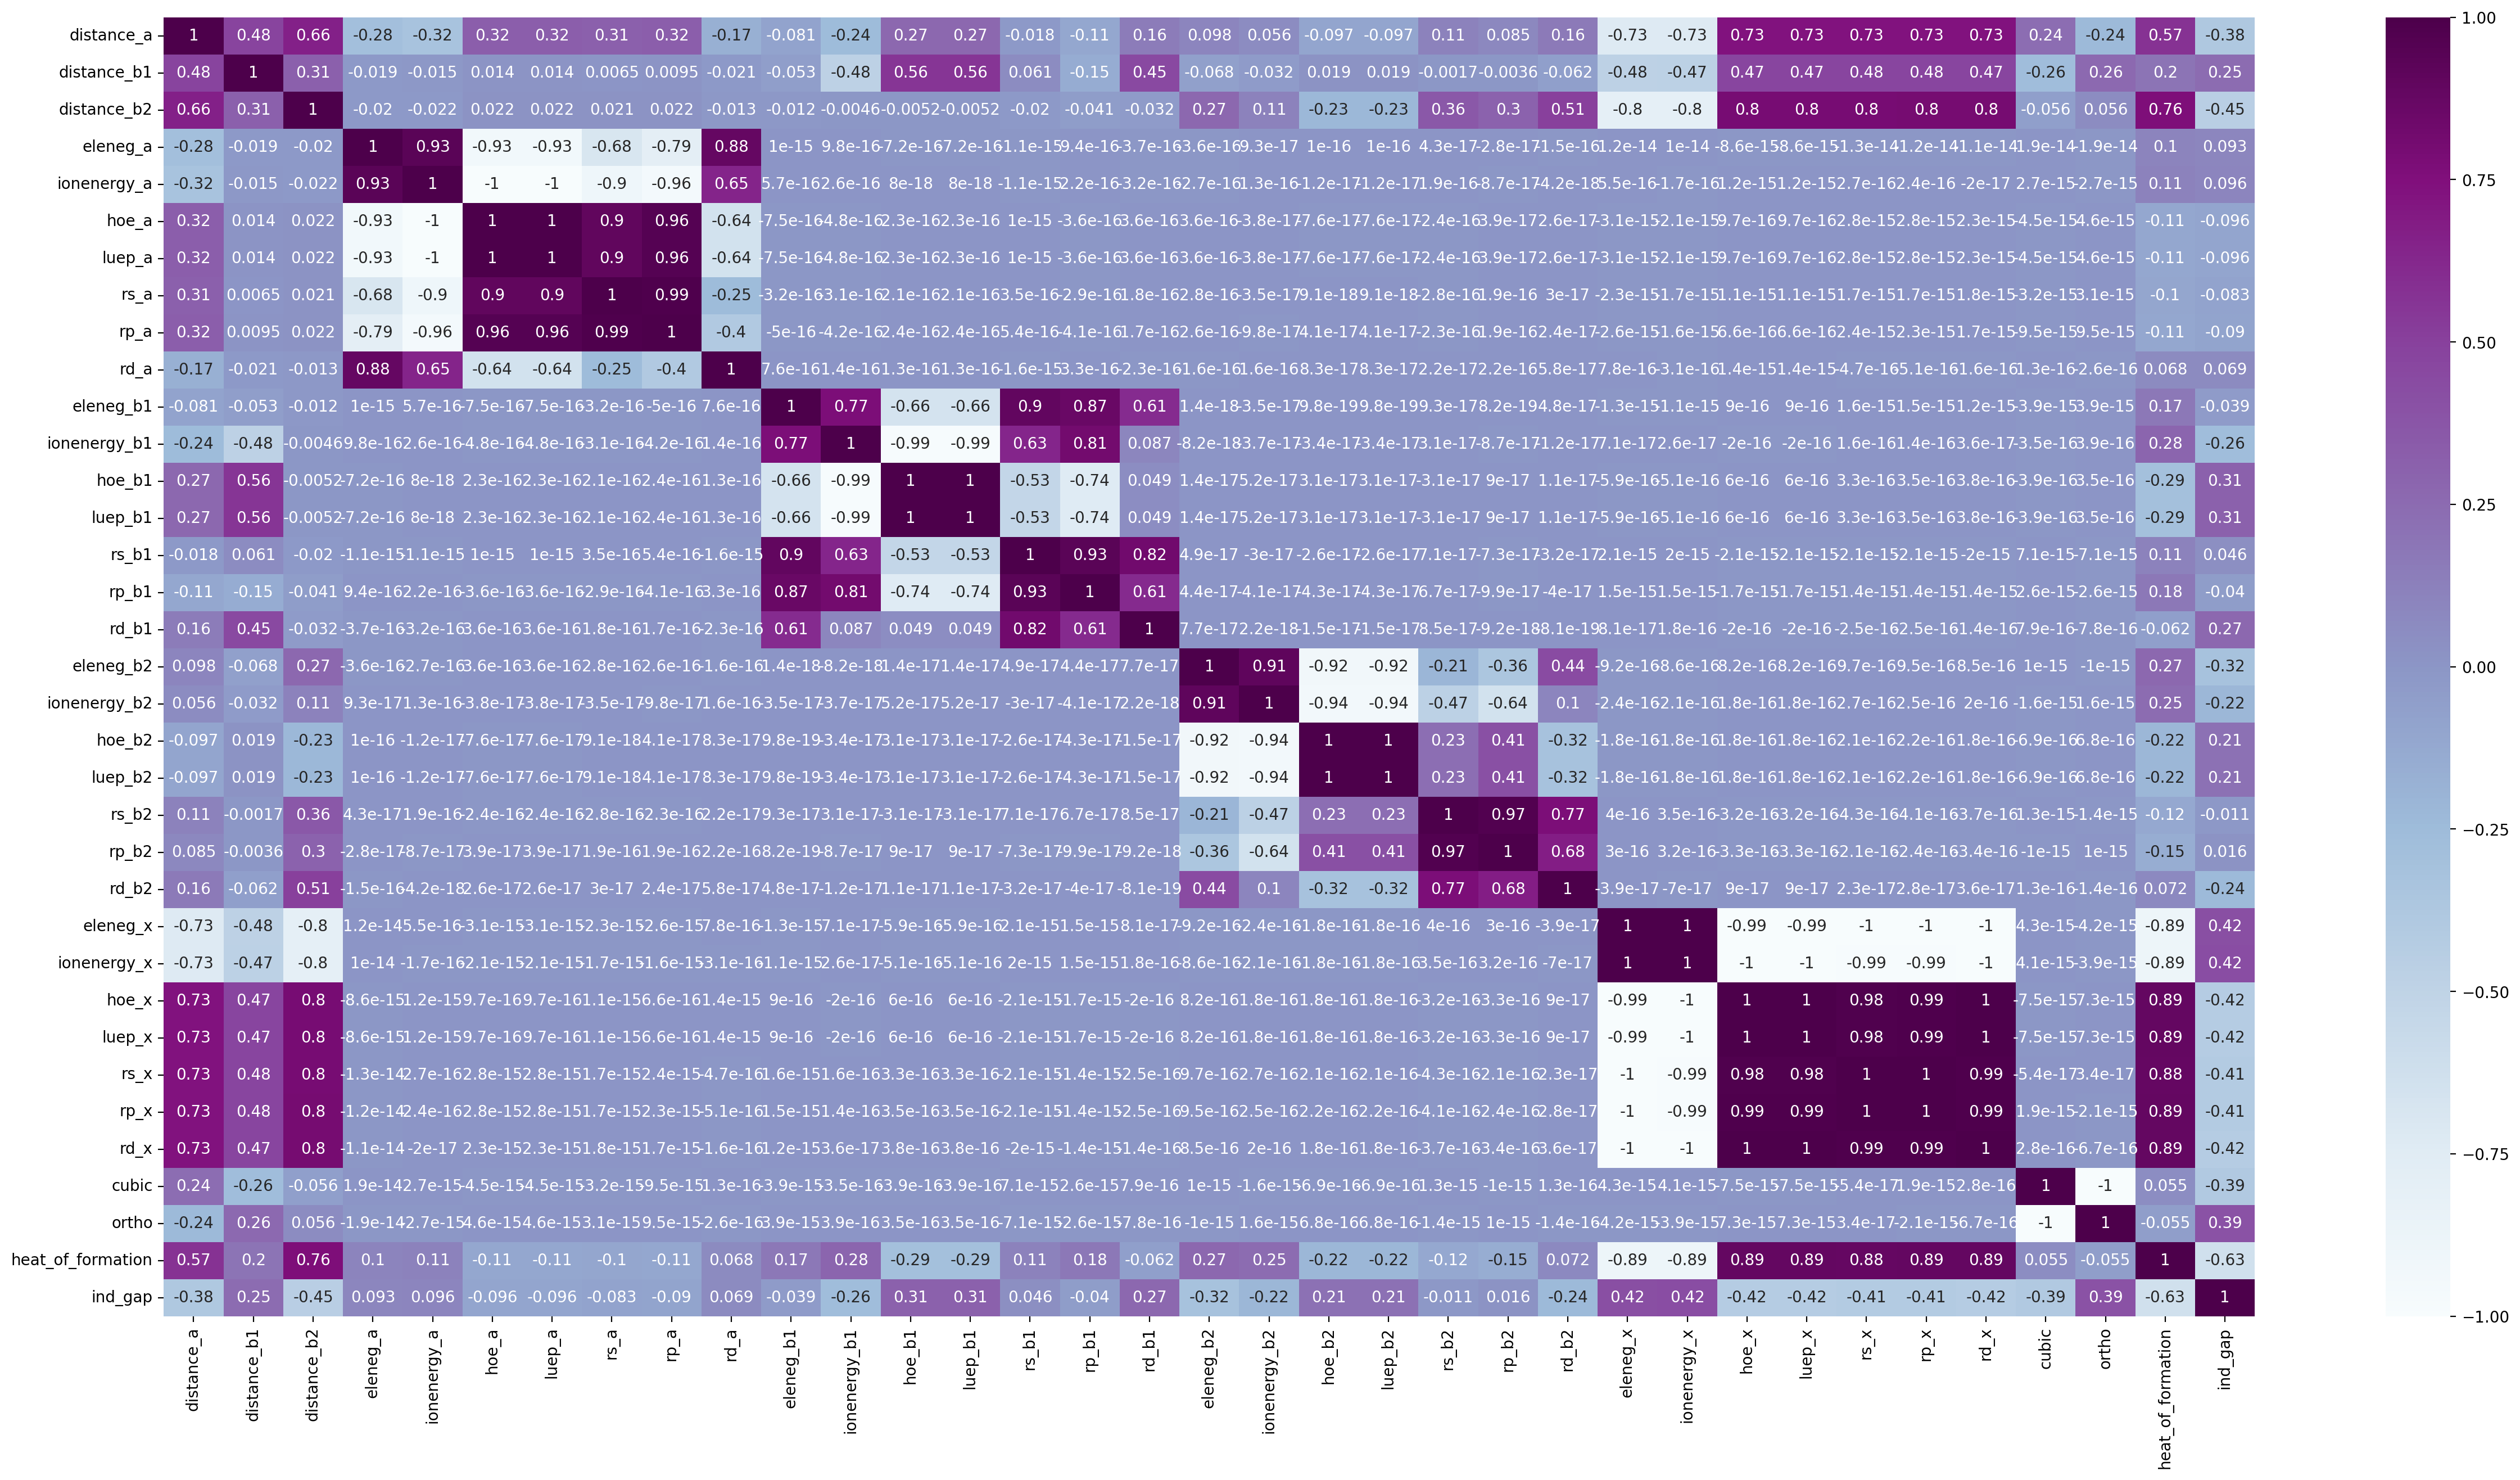

In [6]:
dfmap = data[[ 'distance_a','distance_b1','distance_b2','eleneg_a', 'ionenergy_a', 'hoe_a', 'luep_a', 'rs_a', 'rp_a', 'rd_a',
          'eleneg_b1', 'ionenergy_b1', 'hoe_b1', 'luep_b1', 'rs_b1', 'rp_b1', 'rd_b1',
          'eleneg_b2', 'ionenergy_b2', 'hoe_b2', 'luep_b2', 'rs_b2', 'rp_b2', 'rd_b2',
          'eleneg_x', 'ionenergy_x', 'hoe_x', 'luep_x', 'rs_x', 'rp_x', 'rd_x',
         'cubic','ortho','heat_of_formation','ind_gap'
         ]]

corrmat = dfmap.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,15),dpi=200)
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="BuPu")

In [7]:
#10 random data for validation
rand = {i: i for i in range(0,540)}
val = random.sample(list(rand), 10)

data_val = data.iloc[val]
data = data.drop(val)
data_val

,distance_a,distance_b1,distance_b2,cubic,ortho,eleneg_a,eleneg_b1,eleneg_b2,eleneg_x,hoe_a,...,rp_a,rp_b1,rp_b2,rp_x,rs_a,rs_b1,rs_b2,rs_x,heat_of_formation,ind_gap
108,3.859186,3.073402,2.361015,1,0,0.79,1.78,1.61,3.16,-2.0862,...,2.60,1.11,0.905,0.51,1.71,0.940,0.77,0.500,-1.604787,2.9697
206,4.546003,3.335810,3.090876,1,0,0.79,2.04,2.02,2.66,-2.0862,...,2.60,1.22,1.077,0.83,1.71,1.015,0.92,0.755,-0.955895,0.2898
125,3.784189,2.696795,2.654774,1,0,0.82,1.93,2.05,3.16,-2.3190,...,2.15,1.33,0.935,0.51,1.54,1.045,0.83,0.500,-1.213267,1.2770
191,4.264057,2.976039,3.053996,1,0,0.79,2.54,2.05,2.66,-2.0862,...,2.60,1.45,0.935,0.83,1.71,1.210,0.83,0.755,-0.766324,0.0000
149,4.014642,3.017966,2.653751,1,0,0.82,2.04,2.05,3.16,-2.3190,...,2.15,1.22,0.935,0.51,1.54,1.015,0.83,0.500,-1.289240,0.9869
211,4.149949,2.980763,2.887782,1,0,0.82,1.93,2.18,2.66,-2.3190,...,2.15,1.33,0.745,0.83,1.54,1.045,0.67,0.755,-0.671115,0.2040
52,4.090502,2.890193,2.890193,1,0,0.82,1.78,1.78,2.96,-2.3190,...,2.15,1.11,1.110,0.62,1.54,0.940,0.94,0.580,-1.141480,0.6186
429,3.678690,3.004703,2.586259,0,1,0.82,2.54,1.81,3.16,-2.2327,...,2.43,1.45,0.935,0.51,1.67,1.210,0.76,0.500,-1.234185,2.0708
472,4.450337,3.169900,3.169900,0,1,0.79,1.78,1.78,2.66,-2.0862,...,2.60,1.11,1.110,0.83,1.71,0.940,0.94,0.755,-0.944352,0.3965
65,3.994102,2.831843,2.816660,1,0,0.82,1.93,2.05,2.96,-2.2327,...,2.43,1.33,0.935,0.62,1.67,1.045,0.83,0.580,-1.049092,0.8142


In [8]:
data

,distance_a,distance_b1,distance_b2,cubic,ortho,eleneg_a,eleneg_b1,eleneg_b2,eleneg_x,hoe_a,...,rp_a,rp_b1,rp_b2,rp_x,rs_a,rs_b1,rs_b2,rs_x,heat_of_formation,ind_gap
0,3.870604,2.912570,2.555464,1,0,0.79,1.93,1.61,2.96,-2.0862,...,2.60,1.33,0.905,0.62,1.71,1.045,0.77,0.580,-1.240558,1.0274
1,3.925597,2.858240,2.692150,1,0,0.79,1.93,2.18,2.96,-2.0862,...,2.60,1.33,0.745,0.62,1.71,1.045,0.67,0.580,-1.012833,0.7810
2,4.059806,2.856817,2.884582,1,0,0.79,1.93,2.02,2.96,-2.0862,...,2.60,1.33,1.077,0.62,1.71,1.045,0.92,0.580,-1.145090,1.1399
3,3.887140,2.881822,2.612114,1,0,0.79,1.93,1.81,2.96,-2.0862,...,2.60,1.33,0.935,0.62,1.71,1.045,0.76,0.580,-1.112540,0.0000
4,3.966402,2.870028,2.738541,1,0,0.79,1.93,1.78,2.96,-2.0862,...,2.60,1.33,1.110,0.62,1.71,1.045,0.94,0.580,-1.162859,0.1818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,4.036116,3.440632,2.907324,0,1,0.82,2.04,2.18,2.66,-2.2327,...,2.43,1.22,0.745,0.83,1.67,1.015,0.67,0.755,-0.814923,1.0584
536,4.097096,3.486896,3.118286,0,1,0.82,2.04,2.02,2.66,-2.2327,...,2.43,1.22,1.077,0.83,1.67,1.015,0.92,0.755,-0.943624,1.0077
537,4.024081,3.456462,2.850256,0,1,0.82,2.04,1.81,2.66,-2.2327,...,2.43,1.22,0.935,0.83,1.67,1.015,0.76,0.755,-0.877934,0.7727
538,4.057470,3.475991,2.977066,0,1,0.82,2.04,1.78,2.66,-2.2327,...,2.43,1.22,1.110,0.83,1.67,1.015,0.94,0.755,-0.940822,1.1472


In [9]:
#scaling
col = data.columns
scaler = StandardScaler()
df_scale = scaler.fit_transform(data)
df_scale = pd.DataFrame(df_scale, columns = col)
joblib.dump(scaler, 'scaler.pkl')

df_scale

,distance_a,distance_b1,distance_b2,cubic,ortho,eleneg_a,eleneg_b1,eleneg_b2,eleneg_x,hoe_a,...,rp_a,rp_b1,rp_b2,rp_x,rs_a,rs_b1,rs_b2,rs_x,heat_of_formation,ind_gap
0,-0.315917,-0.253731,-1.003112,1.011386,-1.011386,-1.418226,-0.409487,-1.547059,0.161907,1.318902,...,1.115191,0.623066,-0.382596,-0.250597,0.964513,0.24427,-0.474647,-0.296773,-0.685296,0.142079
1,-0.090442,-0.480079,-0.350112,1.011386,-1.011386,-1.418226,-0.409487,1.414330,0.161907,1.318902,...,1.115191,0.623066,-1.714567,-0.250597,0.964513,0.24427,-1.536990,-0.296773,0.288229,-0.159745
2,0.459823,-0.486007,0.569208,1.011386,-1.011386,-1.418226,-0.409487,0.583063,0.161907,1.318902,...,1.115191,0.623066,1.049273,-0.250597,0.964513,0.24427,1.118868,-0.296773,-0.277169,0.279884
3,-0.248118,-0.381832,-0.732474,1.011386,-1.011386,-1.418226,-0.409487,-0.507975,0.161907,1.318902,...,1.115191,0.623066,-0.132852,-0.250597,0.964513,0.24427,-0.580881,-0.296773,-0.138017,-1.116419
4,0.076861,-0.430968,-0.128484,1.011386,-1.011386,-1.418226,-0.409487,-0.663837,0.161907,1.318902,...,1.115191,0.623066,1.323992,-0.250597,0.964513,0.24427,1.331337,-0.296773,-0.353133,-0.893726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,0.362692,1.946261,0.677855,-0.988743,0.988743,0.705106,0.006928,1.414330,-1.300776,-0.208413,...,0.197242,-0.276062,-1.714567,1.334144,0.412470,-0.02294,-1.536990,1.349498,1.134295,0.180052
526,0.612714,2.139004,1.685700,-0.988743,0.988743,0.705106,0.006928,0.583063,-1.300776,-0.208413,...,0.197242,-0.276062,1.049273,1.334144,0.412470,-0.02294,1.118868,1.349498,0.584098,0.117948
527,0.313348,2.012211,0.405220,-0.988743,0.988743,0.705106,0.006928,-0.507975,-1.300776,-0.208413,...,0.197242,-0.276062,-0.132852,1.334144,0.412470,-0.02294,-0.580881,1.349498,0.864922,-0.169912
528,0.450245,2.093572,1.011039,-0.988743,0.988743,0.705106,0.006928,-0.663837,-1.300776,-0.208413,...,0.197242,-0.276062,1.323992,1.334144,0.412470,-0.02294,1.331337,1.349498,0.596074,0.288826


In [10]:
#splitting
df_x  = df_scale.drop(['ind_gap'], axis=1)
df_y = df_scale['ind_gap']
x_train, x_test, y_train, y_test= train_test_split(df_x, df_y, test_size=0.2,
    random_state=32 )

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(424, 34)
(106, 34)
(424,)
(106,)


# Full Features

In [11]:
#model 1 - GBRT
params = {'n_estimators':2100, 'max_depth': 5, 'min_samples_split': 5,'max_features':0.8,'learning_rate': 0.1, 
          'loss': 'squared_error','random_state':0,'subsample': 0.85}

gbr = ensemble.GradientBoostingRegressor(**params)
gbr.fit(x_train, y_train)
gbr_train_pred = gbr.predict(x_train)
gbr_test_pred = gbr.predict(x_test)

R_GBR = r2_score(y_test, gbr_test_pred)
RMAE_GBR = mean_absolute_error(y_test, gbr_test_pred)
RMSE_GBR = np.sqrt(mean_squared_error(y_test,gbr_test_pred))

print("Model evaluation - Test Set:")
print('r^2:',R_GBR)
print('RMAE', RMAE_GBR)
print('RMSE:', RMSE_GBR)

Model evaluation - Test Set:
r^2: 0.9408508775608732
RMAE 0.17982974498255153
RMSE: 0.2673382828701839


In [12]:
#model 2 - RFR
rf=RandomForestRegressor(n_estimators = 1800, min_samples_split= 4,
                         min_samples_leaf= 1, max_depth= 8, bootstrap= True, max_features = 'sqrt')
rf.fit(x_train, y_train)
rf_train_pred=rf.predict(x_train)
rf_test_pred=rf.predict(x_test)

R_RF = r2_score(y_test, rf_test_pred)
RMAE_RF = mean_absolute_error(y_test, rf_test_pred)
RMSE_RF = np.sqrt(mean_squared_error(y_test,rf_test_pred))

print("Model evaluation - Test Set:")
print('r^2:',R_RF)
print('RMAE', RMAE_RF)
print('RMSE:', RMSE_RF)

Model evaluation - Test Set:
r^2: 0.8967206123953597
RMAE 0.25230557332148085
RMSE: 0.35325948256046014


In [13]:
#model 3 - SVR
svr = SVR(C= 100, kernel='poly', gamma=1,
          epsilon=0.01)
svr.fit(x_train, y_train)
svr_train_pred = svr.predict(x_train)
svr_test_pred = svr.predict(x_test)

R_SVR = r2_score(y_test, svr_test_pred)
RMAE_SVR = mean_absolute_error(y_test, svr_test_pred)
RMSE_SVR = np.sqrt(mean_squared_error(y_test,svr_test_pred))

print("Model evaluation - Test Set:")
print('r^2:',R_SVR)
print('RMAE', RMAE_SVR)
print('RMSE:', RMSE_SVR)

Model evaluation - Test Set:
r^2: 0.8917904922995329
RMAE 0.17232745606614985
RMSE: 0.36159274817423614


In [14]:
#model 4 - MLP
mlp_hw = MLPRegressor(solver='adam',hidden_layer_sizes=(32,64,128,64,32),activation='relu',alpha=0.05,
                     tol=1e-6,max_iter=5000,learning_rate='adaptive',
                     learning_rate_init=0.01,random_state=120)
mlp_hw.fit(x_train, y_train)
pred1_train = mlp_hw.predict(x_train)
mlp_pred = mlp_hw.predict((x_test))

R_MLP = r2_score(y_test, mlp_pred)
RMAE_MLP = mean_absolute_error(y_test, mlp_pred)
RMSE_MLP = np.sqrt(mean_squared_error(y_test,mlp_pred))

print("Model evaluation - Test Set:")
print('r^2:',R_MLP)
print('RMAE', RMAE_MLP)
print('RMSE:', RMSE_MLP)

Model evaluation - Test Set:
r^2: 0.9564213636673614
RMAE 0.1576986389790301
RMSE: 0.22946889244078658


# Evaluation

In [15]:
names = np.array(['GBR', 'SVR', 'RF', 'MLP'])
r2 = np.array([R_GBR, R_SVR, R_RF,R_MLP])
rmse = np.array([RMSE_GBR, RMSE_SVR, RMSE_RF,RMSE_MLP])
rmae = np.array([RMAE_GBR, RMAE_SVR, RMAE_RF,RMAE_MLP])
titles = np.array(['Comparison R^2', 'Comparison RMSE', 'Comparison RMAE'])

In [16]:
def bar (method, output, t):
  plt.bar(method,output, color = ['tab:red','tab:blue','tab:red','tab:blue'])
  plt.title(t)
  plt.plot()

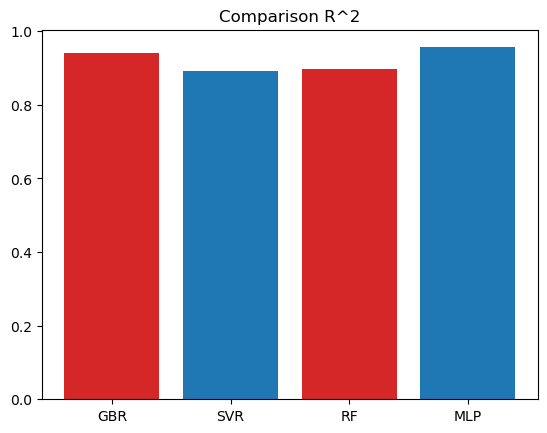

In [17]:
bar(names, r2,titles[0])

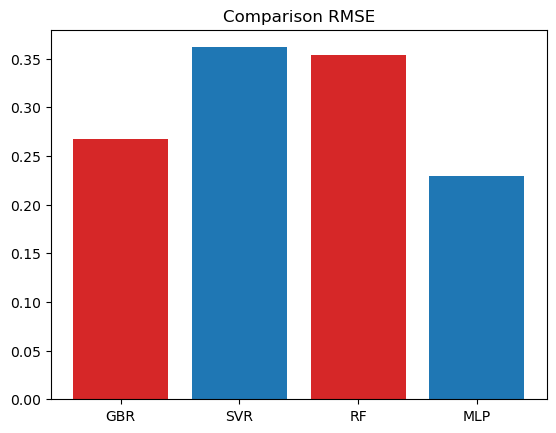

In [18]:
bar(names, rmse,titles[1])

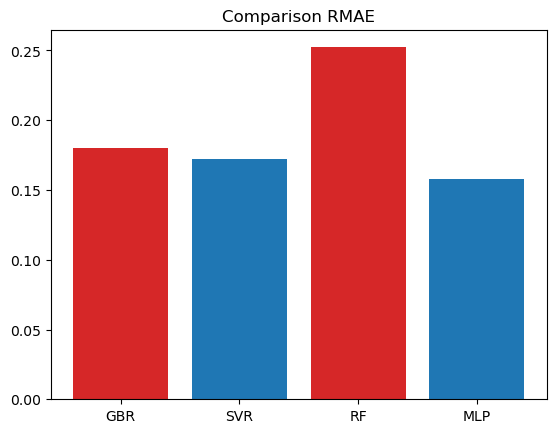

In [19]:
bar(names, rmae,titles[2])

# Feature Selection - LASSO

In [20]:
#alpha coef
model = LassoCV(cv=2, random_state=8, max_iter = 100000)

model.fit(x_train, y_train)

best_alpha = model.alpha_
print(f"Best alpha: {best_alpha}")

Best alpha: 0.0005587471042165803


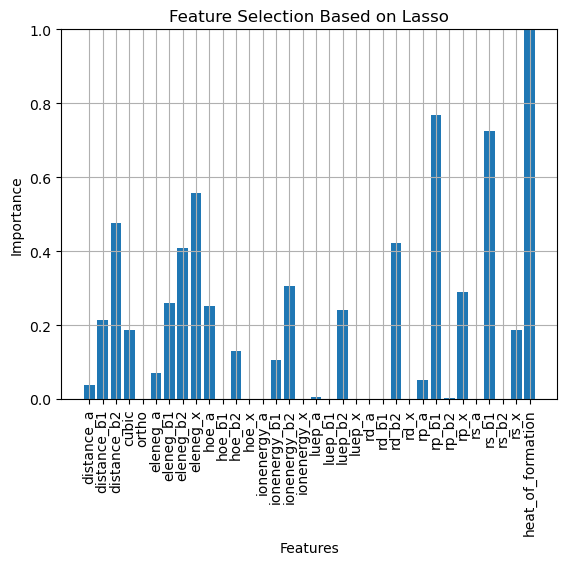

In [21]:
#Feature Selection 1 - LASSO
names = np.array(df_scale.columns[0:-1])
lasso = Lasso(alpha=best_alpha, max_iter=100000)
lasso.fit(x_train, y_train)
lasso_coef = np.abs(lasso.coef_)

plt.bar(names.astype('str'), lasso_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0,1)
plt.show()

In [22]:
for i in range(0,34):
    print(f'fitur' ,col[i], ' : ', lasso_coef[i])

fitur distance_a  :  0.03869873154441961
fitur distance_b1  :  0.21520718194399377
fitur distance_b2  :  0.4755490388587809
fitur cubic  :  0.18805913390005527
fitur ortho  :  0.0
fitur eleneg_a  :  0.07161629056275498
fitur eleneg_b1  :  0.26085130992907396
fitur eleneg_b2  :  0.40753143492015653
fitur eleneg_x  :  0.5568224728184887
fitur hoe_a  :  0.25177290228132226
fitur hoe_b1  :  0.0
fitur hoe_b2  :  0.13039541883090694
fitur hoe_x  :  0.0
fitur ionenergy_a  :  0.0004461577022181693
fitur ionenergy_b1  :  0.10619511693437571
fitur ionenergy_b2  :  0.30717192222766126
fitur ionenergy_x  :  0.0
fitur luep_a  :  0.00674452984809342
fitur luep_b1  :  0.0
fitur luep_b2  :  0.24126019211364372
fitur luep_x  :  0.0
fitur rd_a  :  0.0
fitur rd_b1  :  0.0
fitur rd_b2  :  0.4219359320785516
fitur rd_x  :  0.0
fitur rp_a  :  0.052111792720248636
fitur rp_b1  :  0.7674353949465985
fitur rp_b2  :  0.0019225994404062678
fitur rp_x  :  0.29066384758726616
fitur rs_a  :  0.0
fitur rs_b1  :  0.7

In [23]:
sorted_lasso = [ids for _, ids in sorted(zip(lasso_coef, col), reverse = True)]
print("Selected Feature Columns: {}".format(sorted_lasso[:17]))

print()
# Adding the target to the list of feaatures. 
feature_subset_lasso=np.append(sorted_lasso[:17],'ind_gap')
print("Columns in new Dataframe: {}".format(feature_subset_lasso))

len(feature_subset_lasso)

Selected Feature Columns: ['heat_of_formation', 'rp_b1', 'rs_b1', 'eleneg_x', 'distance_b2', 'rd_b2', 'eleneg_b2', 'ionenergy_b2', 'rp_x', 'eleneg_b1', 'hoe_a', 'luep_b2', 'distance_b1', 'cubic', 'rs_x', 'hoe_b2', 'ionenergy_b1']

Columns in new Dataframe: ['heat_of_formation' 'rp_b1' 'rs_b1' 'eleneg_x' 'distance_b2' 'rd_b2'
 'eleneg_b2' 'ionenergy_b2' 'rp_x' 'eleneg_b1' 'hoe_a' 'luep_b2'
 'distance_b1' 'cubic' 'rs_x' 'hoe_b2' 'ionenergy_b1' 'ind_gap']


18

In [24]:
df_reduced_lasso = df_scale[feature_subset_lasso]
df_reduced_lasso

,heat_of_formation,rp_b1,rs_b1,eleneg_x,distance_b2,rd_b2,eleneg_b2,ionenergy_b2,rp_x,eleneg_b1,hoe_a,luep_b2,distance_b1,cubic,rs_x,hoe_b2,ionenergy_b1,ind_gap
0,-0.685296,0.623066,0.24427,0.161907,-1.003112,-1.628056,-1.547059,-0.830977,-0.250597,-0.409487,1.318902,0.887680,-0.253731,1.011386,-0.296773,0.887680,0.232491,0.142079
1,0.288229,0.623066,0.24427,0.161907,-0.350112,-0.586405,1.414330,1.693928,-0.250597,-0.409487,1.318902,-1.277744,-0.480079,1.011386,-0.296773,-1.277744,0.232491,-0.159745
2,-0.277169,0.623066,0.24427,0.161907,0.569208,1.315447,0.583063,0.031971,-0.250597,-0.409487,1.318902,-0.733030,-0.486007,1.011386,-0.296773,-0.733030,0.232491,0.279884
3,-0.138017,0.623066,0.24427,0.161907,-0.732474,-0.485601,-0.507975,-0.822014,-0.250597,-0.409487,1.318902,1.003688,-0.381832,1.011386,-0.296773,1.003688,0.232491,-1.116419
4,-0.353133,0.623066,0.24427,0.161907,-0.128484,0.791261,-0.663837,-0.963371,-0.250597,-0.409487,1.318902,1.056545,-0.430968,1.011386,-0.296773,1.056545,0.232491,-0.893726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,1.134295,-0.276062,-0.02294,-1.300776,0.677855,-0.586405,1.414330,1.693928,1.334144,0.006928,-0.208413,-1.277744,1.946261,-0.988743,1.349498,-1.277744,-0.953738,0.180052
526,0.584098,-0.276062,-0.02294,-1.300776,1.685700,1.315447,0.583063,0.031971,1.334144,0.006928,-0.208413,-0.733030,2.139004,-0.988743,1.349498,-0.733030,-0.953738,0.117948
527,0.864922,-0.276062,-0.02294,-1.300776,0.405220,-0.485601,-0.507975,-0.822014,1.334144,0.006928,-0.208413,1.003688,2.012211,-0.988743,1.349498,1.003688,-0.953738,-0.169912
528,0.596074,-0.276062,-0.02294,-1.300776,1.011039,0.791261,-0.663837,-0.963371,1.334144,0.006928,-0.208413,1.056545,2.093572,-0.988743,1.349498,1.056545,-0.953738,0.288826


# Feature Selection - SelectKBest

In [25]:
con = 17
i=0

df_x = df_scale.drop(['ind_gap'], axis=1)
df_y = df_scale['ind_gap']

selector = SelectKBest(score_func=mutual_info_regression, k= con)
selector.fit(df_x, df_y)
cols_id = selector.get_support(indices= True)

while i < con :
    print(f"{i} : {col[cols_id[i]]}")
    i+=1

0 : distance_a
1 : distance_b1
2 : distance_b2
3 : cubic
4 : ortho
5 : eleneg_b1
6 : eleneg_b2
7 : hoe_b1
8 : hoe_b2
9 : ionenergy_b1
10 : ionenergy_x
11 : luep_b1
12 : rd_b1
13 : rd_b2
14 : rp_b1
15 : rs_b1
16 : heat_of_formation


In [26]:
feature_subset_select= col[cols_id]
print("Selected Feature Columns: {}".format(feature_subset_select))

print()
# Adding the target to the list of feaatures. 
feature_subset_selectkbest=np.append(feature_subset_select,'ind_gap')
print("Columns in new Dataframe: {}".format(feature_subset_selectkbest))

print(len(feature_subset_selectkbest))

Selected Feature Columns: Index(['distance_a', 'distance_b1', 'distance_b2', 'cubic', 'ortho',
       'eleneg_b1', 'eleneg_b2', 'hoe_b1', 'hoe_b2', 'ionenergy_b1',
       'ionenergy_x', 'luep_b1', 'rd_b1', 'rd_b2', 'rp_b1', 'rs_b1',
       'heat_of_formation'],
      dtype='object')

Columns in new Dataframe: ['distance_a' 'distance_b1' 'distance_b2' 'cubic' 'ortho' 'eleneg_b1'
 'eleneg_b2' 'hoe_b1' 'hoe_b2' 'ionenergy_b1' 'ionenergy_x' 'luep_b1'
 'rd_b1' 'rd_b2' 'rp_b1' 'rs_b1' 'heat_of_formation' 'ind_gap']
18


In [27]:
df_reduced_KBest = df_scale[feature_subset_selectkbest]
df_reduced_KBest

,distance_a,distance_b1,distance_b2,cubic,ortho,eleneg_b1,eleneg_b2,hoe_b1,hoe_b2,ionenergy_b1,ionenergy_x,luep_b1,rd_b1,rd_b2,rp_b1,rs_b1,heat_of_formation,ind_gap
0,-0.315917,-0.253731,-1.003112,1.011386,-1.011386,-0.409487,-1.547059,-0.359677,0.887680,0.232491,0.067514,-0.359677,0.088570,-1.628056,0.623066,0.24427,-0.685296,0.142079
1,-0.090442,-0.480079,-0.350112,1.011386,-1.011386,-0.409487,1.414330,-0.359677,-1.277744,0.232491,0.067514,-0.359677,0.088570,-0.586405,0.623066,0.24427,0.288229,-0.159745
2,0.459823,-0.486007,0.569208,1.011386,-1.011386,-0.409487,0.583063,-0.359677,-0.733030,0.232491,0.067514,-0.359677,0.088570,1.315447,0.623066,0.24427,-0.277169,0.279884
3,-0.248118,-0.381832,-0.732474,1.011386,-1.011386,-0.409487,-0.507975,-0.359677,1.003688,0.232491,0.067514,-0.359677,0.088570,-0.485601,0.623066,0.24427,-0.138017,-1.116419
4,0.076861,-0.430968,-0.128484,1.011386,-1.011386,-0.409487,-0.663837,-0.359677,1.056545,0.232491,0.067514,-0.359677,0.088570,0.791261,0.623066,0.24427,-0.353133,-0.893726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,0.362692,1.946261,0.677855,-0.988743,0.988743,0.006928,1.414330,1.205299,-1.277744,-0.953738,-1.259788,1.205299,0.815198,-0.586405,-0.276062,-0.02294,1.134295,0.180052
526,0.612714,2.139004,1.685700,-0.988743,0.988743,0.006928,0.583063,1.205299,-0.733030,-0.953738,-1.259788,1.205299,0.815198,1.315447,-0.276062,-0.02294,0.584098,0.117948
527,0.313348,2.012211,0.405220,-0.988743,0.988743,0.006928,-0.507975,1.205299,1.003688,-0.953738,-1.259788,1.205299,0.815198,-0.485601,-0.276062,-0.02294,0.864922,-0.169912
528,0.450245,2.093572,1.011039,-0.988743,0.988743,0.006928,-0.663837,1.205299,1.056545,-0.953738,-1.259788,1.205299,0.815198,0.791261,-0.276062,-0.02294,0.596074,0.288826


# Feature Selection - Permutation Importance

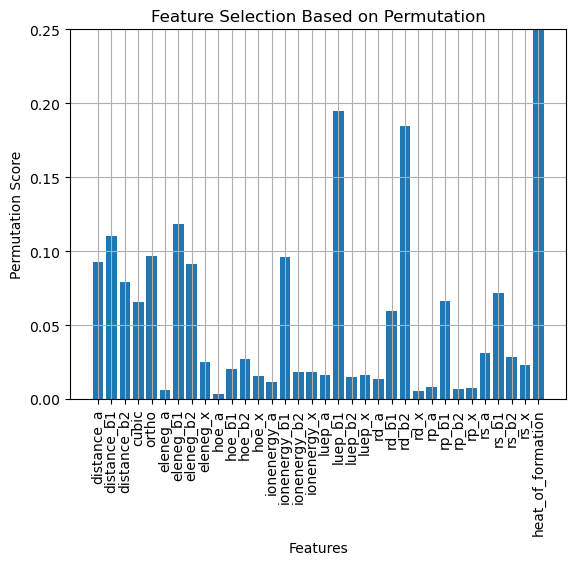

In [28]:
results = permutation_importance(mlp_hw,x_train,y_train, scoring='r2',n_repeats = 16, n_jobs=4, random_state=42)
permutation = results.importances_mean

plt.bar(names.astype('str'), permutation)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Permutation")
plt.xlabel("Features")
plt.ylabel("Permutation Score")
plt.ylim(0,0.25)
plt.show()

In [29]:
for i in range(len(permutation[:16])):
    print(f"{i} {col[i]}   : {permutation[i]}")

0 distance_a   : 0.09271614855579105
1 distance_b1   : 0.1105200038953659
2 distance_b2   : 0.07886855427133513
3 cubic   : 0.0659328571966967
4 ortho   : 0.0970292033511672
5 eleneg_a   : 0.005969111235191886
6 eleneg_b1   : 0.11855340712238813
7 eleneg_b2   : 0.09156646056696216
8 eleneg_x   : 0.02490944345463169
9 hoe_a   : 0.0034284114117212397
10 hoe_b1   : 0.02056974988337875
11 hoe_b2   : 0.02728384979375051
12 hoe_x   : 0.01584860315722647
13 ionenergy_a   : 0.01174847268019786
14 ionenergy_b1   : 0.09602071722838262
15 ionenergy_b2   : 0.01825711802476851


In [30]:
sorted_permutation = [ids for _, ids in sorted(zip(permutation, col), reverse = True)]
print("Selected Feature Columns: {}".format(sorted_permutation[:17]))

print()
# Adding the target to the list of feaatures. 
feature_subset_permutation=np.append(sorted_permutation[:17],'ind_gap')
print("Columns in new Dataframe: {}".format(feature_subset_permutation))

print(len(feature_subset_permutation))

Selected Feature Columns: ['heat_of_formation', 'luep_b1', 'rd_b2', 'eleneg_b1', 'distance_b1', 'ortho', 'ionenergy_b1', 'distance_a', 'eleneg_b2', 'distance_b2', 'rs_b1', 'rp_b1', 'cubic', 'rd_b1', 'rs_a', 'rs_b2', 'hoe_b2']

Columns in new Dataframe: ['heat_of_formation' 'luep_b1' 'rd_b2' 'eleneg_b1' 'distance_b1' 'ortho'
 'ionenergy_b1' 'distance_a' 'eleneg_b2' 'distance_b2' 'rs_b1' 'rp_b1'
 'cubic' 'rd_b1' 'rs_a' 'rs_b2' 'hoe_b2' 'ind_gap']
18


In [31]:
df_reduced_Permutation= df_scale[feature_subset_permutation]
df_reduced_Permutation

,heat_of_formation,luep_b1,rd_b2,eleneg_b1,distance_b1,ortho,ionenergy_b1,distance_a,eleneg_b2,distance_b2,rs_b1,rp_b1,cubic,rd_b1,rs_a,rs_b2,hoe_b2,ind_gap
0,-0.685296,-0.359677,-1.628056,-0.409487,-0.253731,-1.011386,0.232491,-0.315917,-1.547059,-1.003112,0.24427,0.623066,1.011386,0.088570,0.964513,-0.474647,0.887680,0.142079
1,0.288229,-0.359677,-0.586405,-0.409487,-0.480079,-1.011386,0.232491,-0.090442,1.414330,-0.350112,0.24427,0.623066,1.011386,0.088570,0.964513,-1.536990,-1.277744,-0.159745
2,-0.277169,-0.359677,1.315447,-0.409487,-0.486007,-1.011386,0.232491,0.459823,0.583063,0.569208,0.24427,0.623066,1.011386,0.088570,0.964513,1.118868,-0.733030,0.279884
3,-0.138017,-0.359677,-0.485601,-0.409487,-0.381832,-1.011386,0.232491,-0.248118,-0.507975,-0.732474,0.24427,0.623066,1.011386,0.088570,0.964513,-0.580881,1.003688,-1.116419
4,-0.353133,-0.359677,0.791261,-0.409487,-0.430968,-1.011386,0.232491,0.076861,-0.663837,-0.128484,0.24427,0.623066,1.011386,0.088570,0.964513,1.331337,1.056545,-0.893726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,1.134295,1.205299,-0.586405,0.006928,1.946261,0.988743,-0.953738,0.362692,1.414330,0.677855,-0.02294,-0.276062,-0.988743,0.815198,0.412470,-1.536990,-1.277744,0.180052
526,0.584098,1.205299,1.315447,0.006928,2.139004,0.988743,-0.953738,0.612714,0.583063,1.685700,-0.02294,-0.276062,-0.988743,0.815198,0.412470,1.118868,-0.733030,0.117948
527,0.864922,1.205299,-0.485601,0.006928,2.012211,0.988743,-0.953738,0.313348,-0.507975,0.405220,-0.02294,-0.276062,-0.988743,0.815198,0.412470,-0.580881,1.003688,-0.169912
528,0.596074,1.205299,0.791261,0.006928,2.093572,0.988743,-0.953738,0.450245,-0.663837,1.011039,-0.02294,-0.276062,-0.988743,0.815198,0.412470,1.331337,1.056545,0.288826


# Venn Diagram

In [32]:
feature_p = feature_subset_permutation[:-1]
feature_kbes = feature_subset_selectkbest[:-1]
feature_lasso = feature_subset_lasso[:-1]

print(feature_p)
print()
print(feature_kbes)
print()
print(feature_lasso)

['heat_of_formation' 'luep_b1' 'rd_b2' 'eleneg_b1' 'distance_b1' 'ortho'
 'ionenergy_b1' 'distance_a' 'eleneg_b2' 'distance_b2' 'rs_b1' 'rp_b1'
 'cubic' 'rd_b1' 'rs_a' 'rs_b2' 'hoe_b2']

['distance_a' 'distance_b1' 'distance_b2' 'cubic' 'ortho' 'eleneg_b1'
 'eleneg_b2' 'hoe_b1' 'hoe_b2' 'ionenergy_b1' 'ionenergy_x' 'luep_b1'
 'rd_b1' 'rd_b2' 'rp_b1' 'rs_b1' 'heat_of_formation']

['heat_of_formation' 'rp_b1' 'rs_b1' 'eleneg_x' 'distance_b2' 'rd_b2'
 'eleneg_b2' 'ionenergy_b2' 'rp_x' 'eleneg_b1' 'hoe_a' 'luep_b2'
 'distance_b1' 'cubic' 'rs_x' 'hoe_b2' 'ionenergy_b1']


In [33]:
#Venn diagram
feature_lasso = set(feature_lasso)
feature_p = set(feature_p)
feature_kbes = set(feature_kbes)

common = feature_lasso&feature_p&feature_kbes
lasso_p = (feature_lasso&feature_p)-common
lasso_kbes  = (feature_lasso&feature_kbes)-common
p_kbes = (feature_p&feature_kbes)-common
lasso_stand_in = feature_lasso - lasso_p - lasso_kbes - common
p_stand_in = feature_p - lasso_p - p_kbes - common
kbes_stand_in = feature_kbes - lasso_kbes - p_kbes -common

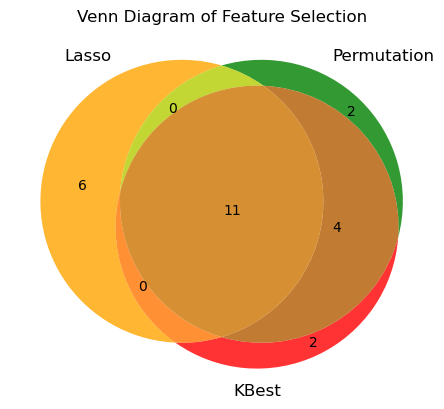

In [34]:
venn3(subsets =(len(lasso_stand_in),len(p_stand_in),len(lasso_p),len(kbes_stand_in),
                len(lasso_kbes),len(p_kbes),len(common)),
                set_labels=('Lasso', 'Permutation', 'KBest'),  
                set_colors=("orange", "green", "red"), alpha=0.8) 
            
plt.title("Venn Diagram of Feature Selection") 
plt.show()

# Evaluation of Feature Selection

In [35]:
# mlp model is used

r2_red = []
rmse_red = []
rmae_red = []

def eval_model(df_reduced):
    scaler = StandardScaler()
    
    df_x  = df_reduced.drop(['ind_gap'], axis=1)
    df_y = df_reduced['ind_gap']
    x_train, x_test, y_train, y_test= train_test_split(df_x, df_y, test_size=0.2,
        random_state=32 )
    
    mlp_hw = MLPRegressor(solver='adam',hidden_layer_sizes=(32,64,128,64,32),activation='relu',alpha=0.05,
                     tol=1e-6,max_iter=5000,learning_rate='adaptive',
                     learning_rate_init=0.01,random_state=120)
    mlp_hw.fit(x_train, y_train)
    pred1_train = mlp_hw.predict(x_train)
    mlp_pred = mlp_hw.predict((x_test))

    R_MLP_red = r2_score(y_test, mlp_pred)
    RMAE_MLP_red = mean_absolute_error(y_test, mlp_pred)
    RMSE_MLP_red = np.sqrt(mean_squared_error(y_test,mlp_pred))
    
    r2_red.append(R_MLP_red)
    rmse_red.append(RMSE_MLP_red)
    rmae_red.append(RMAE_MLP_red)

    print("Model evaluation - Test Set:")
    print('r^2:',R_MLP_red)
    print('RMAE', RMAE_MLP_red)
    print('RMSE:', RMSE_MLP_red)
    
    return R_MLP_red, RMAE_MLP_red, RMSE_MLP_red

In [36]:
#Lasso
eval_model(df_reduced_lasso)

Model evaluation - Test Set:
r^2: 0.9611486830971359
RMAE 0.1559041628812026
RMSE: 0.21666555493089174


(0.9611486830971359, 0.1559041628812026, 0.21666555493089174)

In [37]:
#selectKBest
eval_model(df_reduced_KBest)

Model evaluation - Test Set:
r^2: 0.9631230957872068
RMAE 0.14352402627787356
RMSE: 0.21108833242169478


(0.9631230957872068, 0.14352402627787356, 0.21108833242169478)

In [38]:
#permutation
eval_model(df_reduced_Permutation)

Model evaluation - Test Set:
r^2: 0.9411374931698822
RMAE 0.19107233960511588
RMSE: 0.2666897832009354


(0.9411374931698822, 0.19107233960511588, 0.2666897832009354)

In [39]:
# 8 slected feature
common_np = np.array(list(common))
common_npy = np.append(common_np, 'ind_gap')
df_selec = df_scale[common_npy]

df_selec

,cubic,rd_b2,eleneg_b2,distance_b1,eleneg_b1,ionenergy_b1,distance_b2,rs_b1,hoe_b2,heat_of_formation,rp_b1,ind_gap
0,1.011386,-1.628056,-1.547059,-0.253731,-0.409487,0.232491,-1.003112,0.24427,0.887680,-0.685296,0.623066,0.142079
1,1.011386,-0.586405,1.414330,-0.480079,-0.409487,0.232491,-0.350112,0.24427,-1.277744,0.288229,0.623066,-0.159745
2,1.011386,1.315447,0.583063,-0.486007,-0.409487,0.232491,0.569208,0.24427,-0.733030,-0.277169,0.623066,0.279884
3,1.011386,-0.485601,-0.507975,-0.381832,-0.409487,0.232491,-0.732474,0.24427,1.003688,-0.138017,0.623066,-1.116419
4,1.011386,0.791261,-0.663837,-0.430968,-0.409487,0.232491,-0.128484,0.24427,1.056545,-0.353133,0.623066,-0.893726
...,...,...,...,...,...,...,...,...,...,...,...,...
525,-0.988743,-0.586405,1.414330,1.946261,0.006928,-0.953738,0.677855,-0.02294,-1.277744,1.134295,-0.276062,0.180052
526,-0.988743,1.315447,0.583063,2.139004,0.006928,-0.953738,1.685700,-0.02294,-0.733030,0.584098,-0.276062,0.117948
527,-0.988743,-0.485601,-0.507975,2.012211,0.006928,-0.953738,0.405220,-0.02294,1.003688,0.864922,-0.276062,-0.169912
528,-0.988743,0.791261,-0.663837,2.093572,0.006928,-0.953738,1.011039,-0.02294,1.056545,0.596074,-0.276062,0.288826


In [63]:
print(common_npy)

['cubic' 'rd_b2' 'eleneg_b2' 'distance_b1' 'eleneg_b1' 'ionenergy_b1'
 'distance_b2' 'rs_b1' 'hoe_b2' 'heat_of_formation' 'rp_b1' 'ind_gap']


In [40]:
eval_model(df_selec)

Model evaluation - Test Set:
r^2: 0.946146991890563
RMAE 0.17877606066118368
RMSE: 0.2550891489826285


(0.946146991890563, 0.17877606066118368, 0.2550891489826285)

In [41]:
print(r2_red)
print(rmse_red)
print(rmae_red)

[0.9611486830971359, 0.9631230957872068, 0.9411374931698822, 0.946146991890563]
[0.21666555493089174, 0.21108833242169478, 0.2666897832009354, 0.2550891489826285]
[0.1559041628812026, 0.14352402627787356, 0.19107233960511588, 0.17877606066118368]


In [42]:
names = ['LASSO', 'SelectKBest', 'Permutation', ' Selected']
title = ['R2', 'RMSE', 'RMAE']
def plot(name,metric, title):
    plt.bar(name, height = metric, color =['tab:purple', 'tab:blue', 'tab:purple', 'tab:blue'])
    plt.title(f"Metric "+ title)
    plt.show()

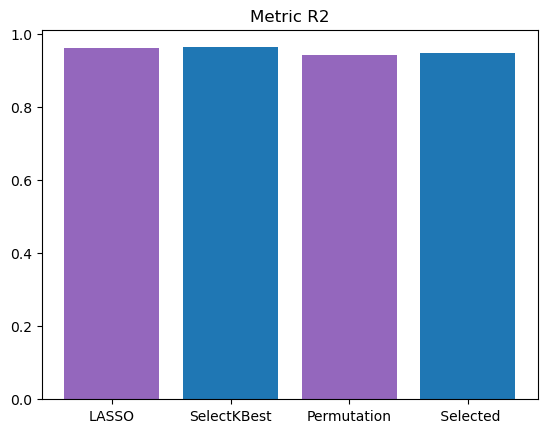

In [43]:
plot(names,r2_red, title[0])

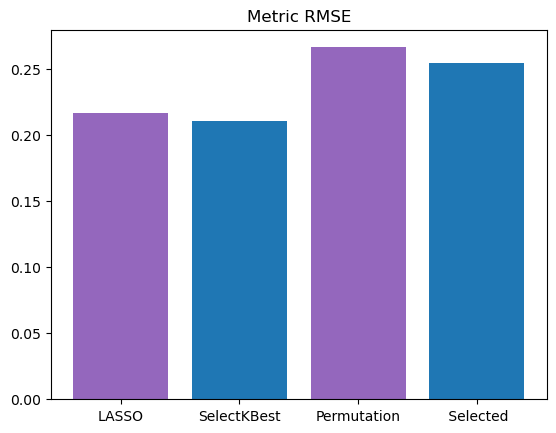

In [44]:
plot(names,rmse_red, title[1])

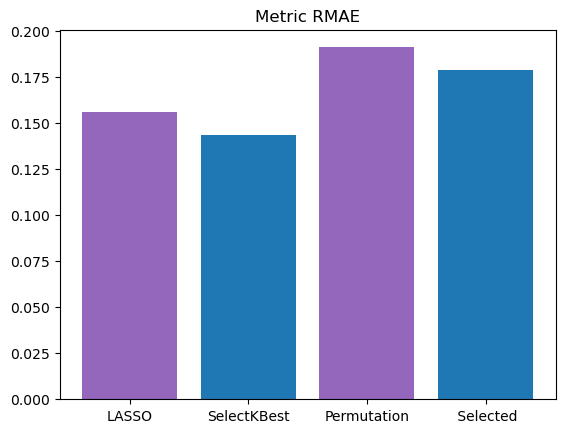

In [45]:
plot(names,rmae_red, title[2])

# Model Saving - Testing

In [46]:
# save model - Lasso

scaler_x = StandardScaler()
scaler_y = StandardScaler()

df = data[feature_subset_lasso]

df_x_l = pd.DataFrame(scaler_x.fit_transform(df.drop(['ind_gap'], axis=1)), columns=df.drop(['ind_gap'], axis=1).columns)
df_y_l = pd.DataFrame(scaler_y.fit_transform(df['ind_gap'].values.reshape(-1, 1)), columns=['ind_gap'])

x_train_l, x_test_l, y_train_l, y_test_l= train_test_split(df_x_l, df_y_l, test_size=0.2,
    random_state=32 )

mlp_l = MLPRegressor(solver='adam',hidden_layer_sizes=(32,64,128,64,32),activation='relu',alpha=0.05,
                     tol=1e-6,max_iter=5000,learning_rate='adaptive',
                     learning_rate_init=0.01,random_state=120)
mlp_l.fit(x_train_l, y_train_l.values.ravel())

joblib.dump(mlp_l, 'mlp_l_model.pkl')
joblib.dump(scaler_x, 'scaler_lasso_x.pkl')
joblib.dump(scaler_y, 'scaler_lasso_y.pkl')

['scaler_lasso_y.pkl']

In [47]:
# save model - SelectKBest

scaler_x = StandardScaler()
scaler_y = StandardScaler()

df = data[feature_subset_selectkbest]

df_x_k = pd.DataFrame(scaler_x.fit_transform(df.drop(['ind_gap'], axis=1)), columns=df.drop(['ind_gap'], axis=1).columns)
df_y_k = pd.DataFrame(scaler_y.fit_transform(df['ind_gap'].values.reshape(-1, 1)), columns=['ind_gap'])

x_train_k, x_test_k, y_train_k, y_test_k= train_test_split(df_x_k, df_y_k, test_size=0.2,
    random_state=32 )

mlp_k = MLPRegressor(solver='adam',hidden_layer_sizes=(32,64,128,64,32),activation='relu',alpha=0.05,
                     tol=1e-6,max_iter=5000,learning_rate='adaptive',
                     learning_rate_init=0.01,random_state=120)
mlp_k.fit(x_train_k, y_train_k.values.ravel())

joblib.dump(mlp_k, 'mlp_k_model.pkl')
joblib.dump(scaler_x, 'scaler_kbest_x.pkl')
joblib.dump(scaler_y, 'scaler_kbest_y.pkl')

['scaler_kbest_y.pkl']

In [48]:
# save model - permutation

scaler_x = StandardScaler()
scaler_y = StandardScaler()

df = data[feature_subset_permutation]
df_x_p = pd.DataFrame(scaler_x.fit_transform(df.drop(['ind_gap'], axis=1)), columns=df.drop(['ind_gap'], axis=1).columns)
df_y_p = pd.DataFrame(scaler_y.fit_transform(df['ind_gap'].values.reshape(-1, 1)), columns=['ind_gap'])

x_train_p, x_test_p, y_train_p, y_test_p= train_test_split(df_x_p, df_y_p, test_size=0.2,
    random_state=32 )

mlp_p = MLPRegressor(solver='adam',hidden_layer_sizes=(32,64,128,64,32),activation='relu',alpha=0.05,
                     tol=1e-6,max_iter=5000,learning_rate='adaptive',
                     learning_rate_init=0.01,random_state=120)
mlp_p.fit(x_train_p, y_train_p.values.ravel())

joblib.dump(mlp_p, 'mlp_p_model.pkl')
joblib.dump(scaler_x, 'scaler_permutation_x.pkl')
joblib.dump(scaler_y, 'scaler_permutation_y.pkl')

['scaler_permutation_y.pkl']

In [49]:
# save model -  select

scaler_x = StandardScaler()
scaler_y = StandardScaler()

df = data[common_npy]
df_x_s = pd.DataFrame(scaler_x.fit_transform(df.drop(['ind_gap'], axis=1)), columns=df.drop(['ind_gap'], axis=1).columns)
df_y_s = pd.DataFrame(scaler_y.fit_transform(df['ind_gap'].values.reshape(-1, 1)), columns=['ind_gap'])

x_train_s, x_test_s, y_train_s, y_test_s= train_test_split(df_x_s, df_y_s, test_size=0.2,
    random_state=32 )

mlp_s = MLPRegressor(solver='adam',hidden_layer_sizes=(64,128,64),activation='relu',alpha=0.05,
                     tol=1e-5,max_iter=50000,learning_rate='adaptive',
                     learning_rate_init=0.01,random_state=120)
mlp_s.fit(x_train_s, y_train_s.values.ravel())

joblib.dump(mlp_s, 'mlp_s_model.pkl')
joblib.dump(scaler_x, 'scaler_selected_x.pkl')
joblib.dump(scaler_y, 'scaler_selected_y.pkl')

['scaler_selected_y.pkl']

In [50]:
# save data validation for pipeline

data_val.to_csv('data_val.csv', index = False)

# Trial Pipeline

In [51]:
dff = pd.read_csv('data_val.csv')
dff

,distance_a,distance_b1,distance_b2,cubic,ortho,eleneg_a,eleneg_b1,eleneg_b2,eleneg_x,hoe_a,...,rp_a,rp_b1,rp_b2,rp_x,rs_a,rs_b1,rs_b2,rs_x,heat_of_formation,ind_gap
0,3.859186,3.073402,2.361015,1,0,0.79,1.78,1.61,3.16,-2.0862,...,2.60,1.11,0.905,0.51,1.71,0.940,0.77,0.500,-1.604787,2.9697
1,4.546003,3.335810,3.090876,1,0,0.79,2.04,2.02,2.66,-2.0862,...,2.60,1.22,1.077,0.83,1.71,1.015,0.92,0.755,-0.955895,0.2898
2,3.784189,2.696795,2.654774,1,0,0.82,1.93,2.05,3.16,-2.3190,...,2.15,1.33,0.935,0.51,1.54,1.045,0.83,0.500,-1.213267,1.2770
3,4.264057,2.976039,3.053996,1,0,0.79,2.54,2.05,2.66,-2.0862,...,2.60,1.45,0.935,0.83,1.71,1.210,0.83,0.755,-0.766324,0.0000
4,4.014642,3.017966,2.653751,1,0,0.82,2.04,2.05,3.16,-2.3190,...,2.15,1.22,0.935,0.51,1.54,1.015,0.83,0.500,-1.289240,0.9869
5,4.149949,2.980763,2.887782,1,0,0.82,1.93,2.18,2.66,-2.3190,...,2.15,1.33,0.745,0.83,1.54,1.045,0.67,0.755,-0.671115,0.2040
6,4.090502,2.890193,2.890193,1,0,0.82,1.78,1.78,2.96,-2.3190,...,2.15,1.11,1.110,0.62,1.54,0.940,0.94,0.580,-1.141480,0.6186
7,3.678690,3.004703,2.586259,0,1,0.82,2.54,1.81,3.16,-2.2327,...,2.43,1.45,0.935,0.51,1.67,1.210,0.76,0.500,-1.234185,2.0708
8,4.450337,3.169900,3.169900,0,1,0.79,1.78,1.78,2.66,-2.0862,...,2.60,1.11,1.110,0.83,1.71,0.940,0.94,0.755,-0.944352,0.3965
9,3.994102,2.831843,2.816660,1,0,0.82,1.93,2.05,2.96,-2.2327,...,2.43,1.33,0.935,0.62,1.67,1.045,0.83,0.580,-1.049092,0.8142


In [52]:
r2_arr = []
rmse_arr =[]
rmae_arr = []

names = ['MLP-Lasso', 'MLP-SelectKBest', 'MLP-Permutation', 'MLP-Selected']

In [53]:
# Lasso
scaler_x = joblib.load('scaler_lasso_x.pkl')
scaler_y = joblib.load('scaler_lasso_y.pkl') 
mlpL_pipeline = joblib.load('mlp_l_model.pkl')

dff_x = dff[feature_subset_lasso].drop(['ind_gap'], axis=1)
dff_y = dff['ind_gap']

dff_x_scaled = pd.DataFrame(
    scaler_x.transform(dff_x),
    columns=dff_x.columns
)

predL_pipeline_scaled = mlpL_pipeline.predict(dff_x_scaled)
predL_pipeline = scaler_y.inverse_transform(predL_pipeline_scaled.reshape(-1, 1)).ravel()

mse = mean_squared_error(dff_y, predL_pipeline)
mae = mean_absolute_error(dff_y, predL_pipeline)
r2 = r2_score(dff_y, predL_pipeline)

r2_arr.append(r2)
rmse_arr.append(mse)
rmae_arr.append(mae)

print(f"Validation R2: {r2:.4f}")
print(f"Validation MSE: {mse:.4f}")
print(f"Validation MAE: {mae:.4f}")

Validation R2: 0.9725
Validation MSE: 0.0214
Validation MAE: 0.1165


In [54]:
# SelectKBest
scaler_x = joblib.load('scaler_kbest_x.pkl')
scaler_y = joblib.load('scaler_kbest_y.pkl') 
mlpK_pipeline = joblib.load('mlp_k_model.pkl')

dff_x = dff[feature_subset_selectkbest].drop(['ind_gap'], axis=1)
dff_y = dff['ind_gap']

dff_x_scaled = pd.DataFrame(
    scaler_x.transform(dff_x),
    columns=dff_x.columns
)

predK_pipeline_scaled = mlpK_pipeline.predict(dff_x_scaled)
predK_pipeline = scaler_y.inverse_transform(predK_pipeline_scaled.reshape(-1, 1)).ravel()

mse = mean_squared_error(dff_y, predK_pipeline)
mae = mean_absolute_error(dff_y, predK_pipeline)
r2 = r2_score(dff_y, predK_pipeline)

r2_arr.append(r2)
rmse_arr.append(mse)
rmae_arr.append(mae)

print(f"Validation R2: {r2:.4f}")
print(f"Validation MSE: {mse:.4f}")
print(f"Validation MAE: {mae:.4f}")

Validation R2: 0.9769
Validation MSE: 0.0180
Validation MAE: 0.0929


In [55]:
# permutation

scaler_x = joblib.load('scaler_permutation_x.pkl')
scaler_y = joblib.load('scaler_permutation_y.pkl') 
mlpP_pipeline = joblib.load('mlp_p_model.pkl')

dff_x = dff[feature_subset_permutation].drop(['ind_gap'], axis=1)
dff_y = dff['ind_gap']

dff_x_scaled = pd.DataFrame(
    scaler_x.transform(dff_x),
    columns=dff_x.columns
)

predP_pipeline_scaled = mlpP_pipeline.predict(dff_x_scaled)
predP_pipeline = scaler_y.inverse_transform(predP_pipeline_scaled.reshape(-1, 1)).ravel()

mse = mean_squared_error(dff_y, predP_pipeline)
mae = mean_absolute_error(dff_y, predP_pipeline)
r2 = r2_score(dff_y, predP_pipeline)

r2_arr.append(r2)
rmse_arr.append(mse)
rmae_arr.append(mae)

print(f"Validation R2: {r2:.4f}")
print(f"Validation MSE: {mse:.4f}")
print(f"Validation MAE: {mae:.4f}")

Validation R2: 0.9604
Validation MSE: 0.0308
Validation MAE: 0.1497


In [56]:
# Select8

scaler_x = joblib.load('scaler_selected_x.pkl')
scaler_y = joblib.load('scaler_selected_y.pkl') 
mlpS_pipeline = joblib.load('mlp_s_model.pkl')

dff_x = dff[common_npy].drop(['ind_gap'], axis=1)
dff_y = dff['ind_gap']

dff_x_scaled = pd.DataFrame(
    scaler_x.transform(dff_x),
    columns=dff_x.columns
)

predS_pipeline_scaled = mlpS_pipeline.predict(dff_x_scaled)
predS_pipeline = scaler_y.inverse_transform(predS_pipeline_scaled.reshape(-1, 1)).ravel()

mse = mean_squared_error(dff_y, predS_pipeline)
mae = mean_absolute_error(dff_y, predS_pipeline)
r2 = r2_score(dff_y, predS_pipeline)

r2_arr.append(r2)
rmse_arr.append(mse)
rmae_arr.append(mae)

print(f"Validation R2: {r2:.4f}")
print(f"Validation MSE: {mse:.4f}")
print(f"Validation MAE: {mae:.4f}")

Validation R2: 0.9715
Validation MSE: 0.0221
Validation MAE: 0.1398


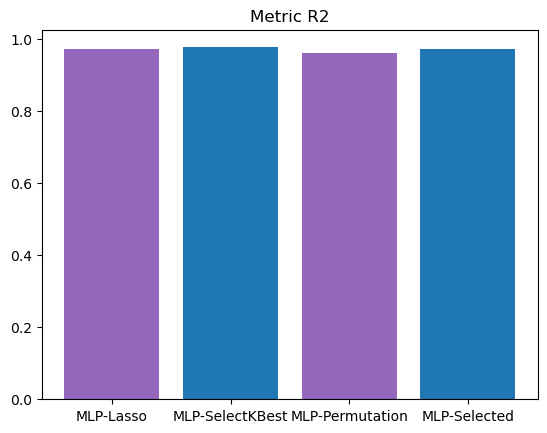

In [57]:
plot(names, r2_arr, title[0])

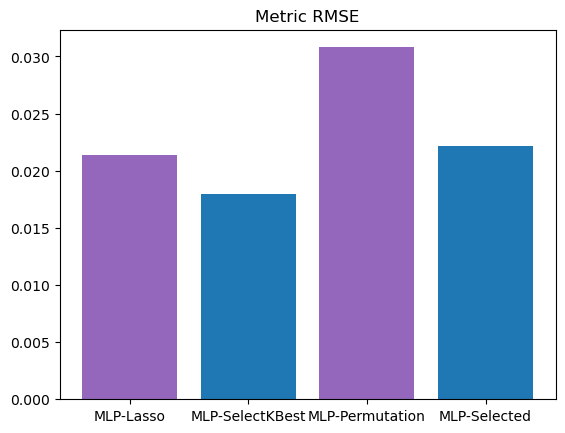

In [58]:
plot(names, rmse_arr, title[1])

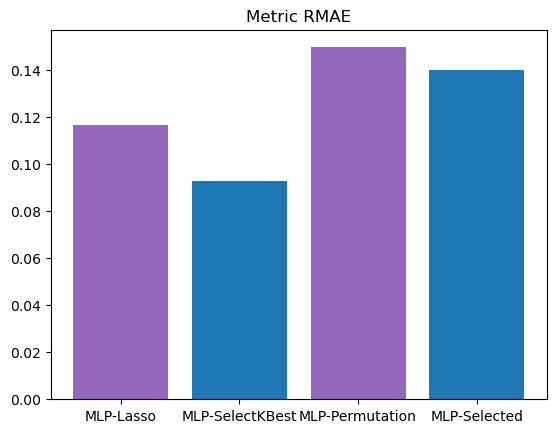

In [59]:
plot(names, rmae_arr, title[2])

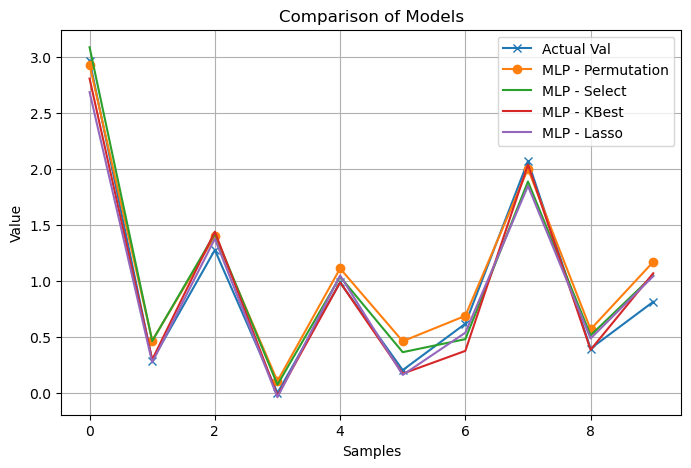

In [60]:
plt.figure(figsize=(8, 5))

plt.plot(dff_y, label='Actual Val', marker='x')
plt.plot(predP_pipeline, label='MLP - Permutation', marker='o')
plt.plot(predS_pipeline, label='MLP - Select', linestyle='-')
plt.plot(predK_pipeline, label='MLP - KBest', linestyle='-')
plt.plot(predL_pipeline, label='MLP - Lasso', linestyle='-')

plt.title('Comparison of Models')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [61]:
data

,distance_a,distance_b1,distance_b2,cubic,ortho,eleneg_a,eleneg_b1,eleneg_b2,eleneg_x,hoe_a,...,rp_a,rp_b1,rp_b2,rp_x,rs_a,rs_b1,rs_b2,rs_x,heat_of_formation,ind_gap
0,3.870604,2.912570,2.555464,1,0,0.79,1.93,1.61,2.96,-2.0862,...,2.60,1.33,0.905,0.62,1.71,1.045,0.77,0.580,-1.240558,1.0274
1,3.925597,2.858240,2.692150,1,0,0.79,1.93,2.18,2.96,-2.0862,...,2.60,1.33,0.745,0.62,1.71,1.045,0.67,0.580,-1.012833,0.7810
2,4.059806,2.856817,2.884582,1,0,0.79,1.93,2.02,2.96,-2.0862,...,2.60,1.33,1.077,0.62,1.71,1.045,0.92,0.580,-1.145090,1.1399
3,3.887140,2.881822,2.612114,1,0,0.79,1.93,1.81,2.96,-2.0862,...,2.60,1.33,0.935,0.62,1.71,1.045,0.76,0.580,-1.112540,0.0000
4,3.966402,2.870028,2.738541,1,0,0.79,1.93,1.78,2.96,-2.0862,...,2.60,1.33,1.110,0.62,1.71,1.045,0.94,0.580,-1.162859,0.1818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,4.036116,3.440632,2.907324,0,1,0.82,2.04,2.18,2.66,-2.2327,...,2.43,1.22,0.745,0.83,1.67,1.015,0.67,0.755,-0.814923,1.0584
536,4.097096,3.486896,3.118286,0,1,0.82,2.04,2.02,2.66,-2.2327,...,2.43,1.22,1.077,0.83,1.67,1.015,0.92,0.755,-0.943624,1.0077
537,4.024081,3.456462,2.850256,0,1,0.82,2.04,1.81,2.66,-2.2327,...,2.43,1.22,0.935,0.83,1.67,1.015,0.76,0.755,-0.877934,0.7727
538,4.057470,3.475991,2.977066,0,1,0.82,2.04,1.78,2.66,-2.2327,...,2.43,1.22,1.110,0.83,1.67,1.015,0.94,0.755,-0.940822,1.1472


In [62]:
data_val

,distance_a,distance_b1,distance_b2,cubic,ortho,eleneg_a,eleneg_b1,eleneg_b2,eleneg_x,hoe_a,...,rp_a,rp_b1,rp_b2,rp_x,rs_a,rs_b1,rs_b2,rs_x,heat_of_formation,ind_gap
108,3.859186,3.073402,2.361015,1,0,0.79,1.78,1.61,3.16,-2.0862,...,2.60,1.11,0.905,0.51,1.71,0.940,0.77,0.500,-1.604787,2.9697
206,4.546003,3.335810,3.090876,1,0,0.79,2.04,2.02,2.66,-2.0862,...,2.60,1.22,1.077,0.83,1.71,1.015,0.92,0.755,-0.955895,0.2898
125,3.784189,2.696795,2.654774,1,0,0.82,1.93,2.05,3.16,-2.3190,...,2.15,1.33,0.935,0.51,1.54,1.045,0.83,0.500,-1.213267,1.2770
191,4.264057,2.976039,3.053996,1,0,0.79,2.54,2.05,2.66,-2.0862,...,2.60,1.45,0.935,0.83,1.71,1.210,0.83,0.755,-0.766324,0.0000
149,4.014642,3.017966,2.653751,1,0,0.82,2.04,2.05,3.16,-2.3190,...,2.15,1.22,0.935,0.51,1.54,1.015,0.83,0.500,-1.289240,0.9869
211,4.149949,2.980763,2.887782,1,0,0.82,1.93,2.18,2.66,-2.3190,...,2.15,1.33,0.745,0.83,1.54,1.045,0.67,0.755,-0.671115,0.2040
52,4.090502,2.890193,2.890193,1,0,0.82,1.78,1.78,2.96,-2.3190,...,2.15,1.11,1.110,0.62,1.54,0.940,0.94,0.580,-1.141480,0.6186
429,3.678690,3.004703,2.586259,0,1,0.82,2.54,1.81,3.16,-2.2327,...,2.43,1.45,0.935,0.51,1.67,1.210,0.76,0.500,-1.234185,2.0708
472,4.450337,3.169900,3.169900,0,1,0.79,1.78,1.78,2.66,-2.0862,...,2.60,1.11,1.110,0.83,1.71,0.940,0.94,0.755,-0.944352,0.3965
65,3.994102,2.831843,2.816660,1,0,0.82,1.93,2.05,2.96,-2.2327,...,2.43,1.33,0.935,0.62,1.67,1.045,0.83,0.580,-1.049092,0.8142


In [64]:
!pip freeze requirements.txt

absl-py==2.1.0
aggdraw==1.3.18.post0
aiobotocore @ file:///C:/b/abs_1c1a_vjay2/croot/aiobotocore_1682537737724/work
aiofiles @ file:///C:/b/abs_9ex6mi6b56/croot/aiofiles_1683773603390/work
aiohttp @ file:///C:/b/abs_b78zt6vo64/croot/aiohttp_1694181126607/work
aioitertools @ file:///tmp/build/80754af9/aioitertools_1607109665762/work
aiosignal @ file:///tmp/build/80754af9/aiosignal_1637843061372/work
aiosqlite @ file:///C:/b/abs_9djc_0pyi3/croot/aiosqlite_1683773915844/work
alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
anaconda-anon-usage @ file:///C:/b/abs_f4tsjyl9va/croot/anaconda-anon-usage_1695310457827/work
anaconda-catalogs @ file:///C:/b/abs_8btyy0o8s8/croot/anaconda-catalogs_1685727315626/work
anaconda-client @ file:///C:/b/abs_80wttmgui4/croot/anaconda-client_1694625288614/work
anaconda-cloud-auth @ file:///C:/b/abs_5cjpnu6wjb/croot/anaconda-cloud-auth_1694462130037/work
anaconda-navigator @ file:///C:/b/abs_ab00e0_u7e/croot/anaconda-navigator_1695238210954

In [65]:
pd.__version__

'2.0.3'

In [66]:
np.__version__

'1.26.4'

In [67]:
joblib.__version__

'1.2.0'

In [68]:
sklearn.__version__

'1.2.0'